In [244]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statistics
import matplotlib.dates as mdates
from sklearn.utils import resample

In [245]:
dataset_moderate = pd.read_csv('Moderate_investor.csv').copy()
dataset_optimal = pd.read_csv('Optimal_investor.csv').copy()
dataset_risky = pd.read_csv('Risky_investor.csv').copy()
dataset_conservative = pd.read_csv('Conservative_investor.csv').copy()

In [254]:
def annual_return(dataset, str):
    dataset['daily_return'] = dataset[str].pct_change()
    mean_y1 = ((dataset["daily_return"][3:364].mean() + 1)** 365) - 1
    mean_y2 = ((dataset["daily_return"][365:729].mean() + 1)** 365) - 1
    mean_y3 = ((dataset["daily_return"][730:1094].mean() + 1)** 365) - 1
    mean_y4 = ((dataset["daily_return"][1095:1459].mean() + 1)** 365) - 1
    mean_y5 = ((dataset["daily_return"][1460:1824].mean() + 1)** 365) - 1
    return [100*mean_y1, 100*mean_y2, 100*mean_y3, 100*mean_y4, 100*mean_y5]

In [255]:
dataset_moderate["bit"] = dataset_moderate["Bitcoin"]*dataset_moderate["Bitcoin_price"]
dataset_moderate["gld"] = dataset_moderate["Gold"]*dataset_moderate["Gold_price"]
dataset_moderate["combined"] = dataset_moderate["bit"]+dataset_moderate["gld"]

In [256]:
dataset_risky["bit"] = dataset_risky["Bitcoin"]*dataset_risky["Bitcoin_price"]
dataset_risky["gld"] = dataset_risky["Gold"]*dataset_risky["Gold_price"]
dataset_risky["combined"] = dataset_risky["bit"]+dataset_risky["gld"]

In [257]:
dataset_conservative["bit"] = dataset_conservative["Bitcoin"]*dataset_conservative["Bitcoin_price"]
dataset_conservative["gld"] = dataset_conservative["Gold"]*dataset_conservative["Gold_price"]
dataset_conservative["combined"] = dataset_conservative["bit"]+dataset_conservative["gld"]

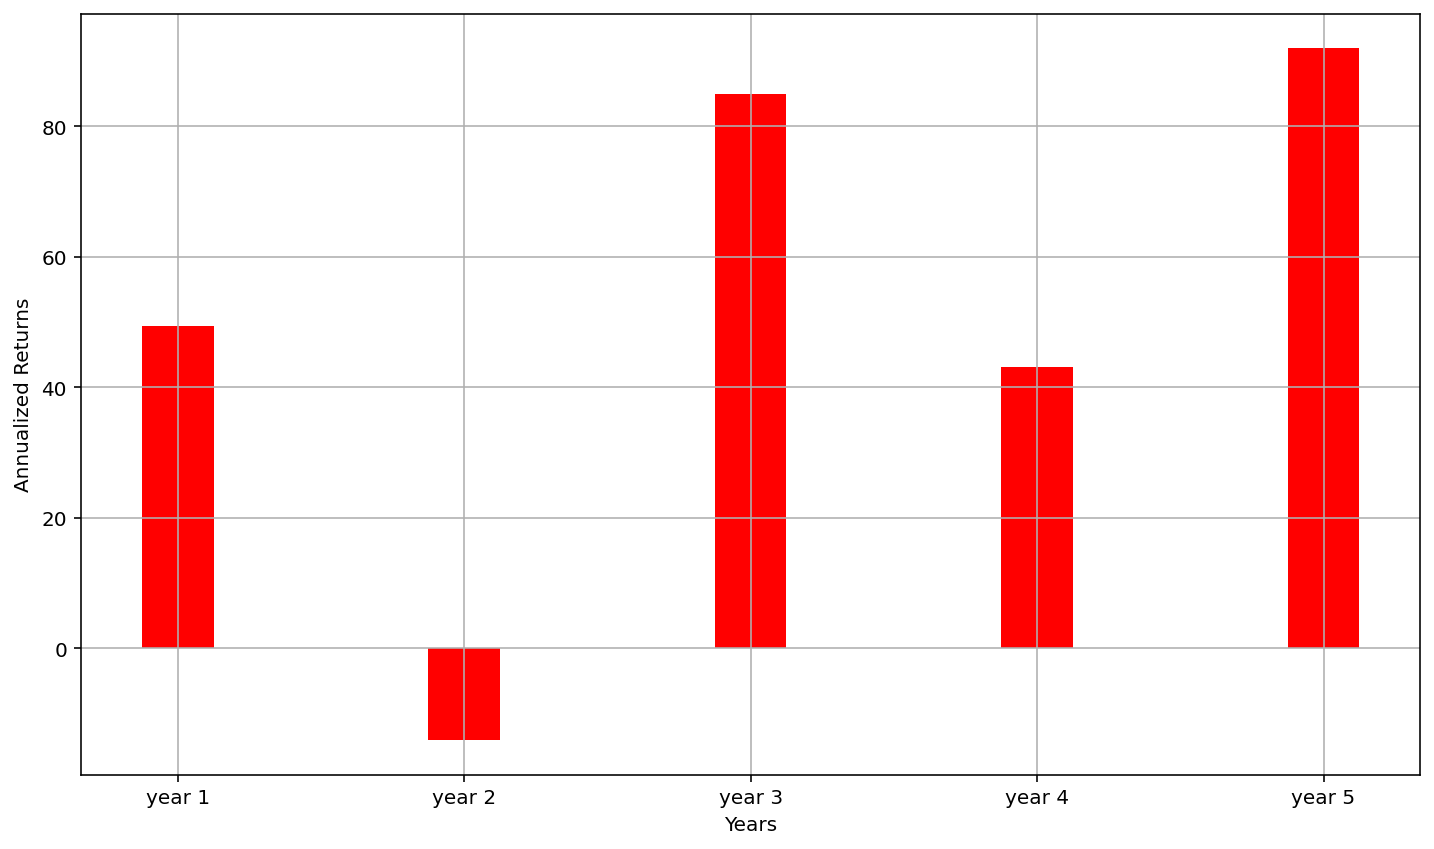

In [258]:
ax = plt.gca()
ax.set(xlabel="Years", ylabel='Annualized Returns')
years = ['year 1','year 2','year 3','year 4','year 5']
(dataset, str) = (dataset_risky, 'combined')
ar = annual_return(dataset, str)
ax.bar( years[0], ar[0], color = 'red', width = 0.25)
ax.bar( years[1], ar[1], color = 'red', width = 0.25)
ax.bar( years[2], ar[2], color = 'red', width = 0.25)
ax.bar( years[3], ar[3],color = 'red', width = 0.25)
ax.bar( years[4], ar[4],color = 'red', width = 0.25)
plt.grid()
plt.savefig('annual_return_risky.png')

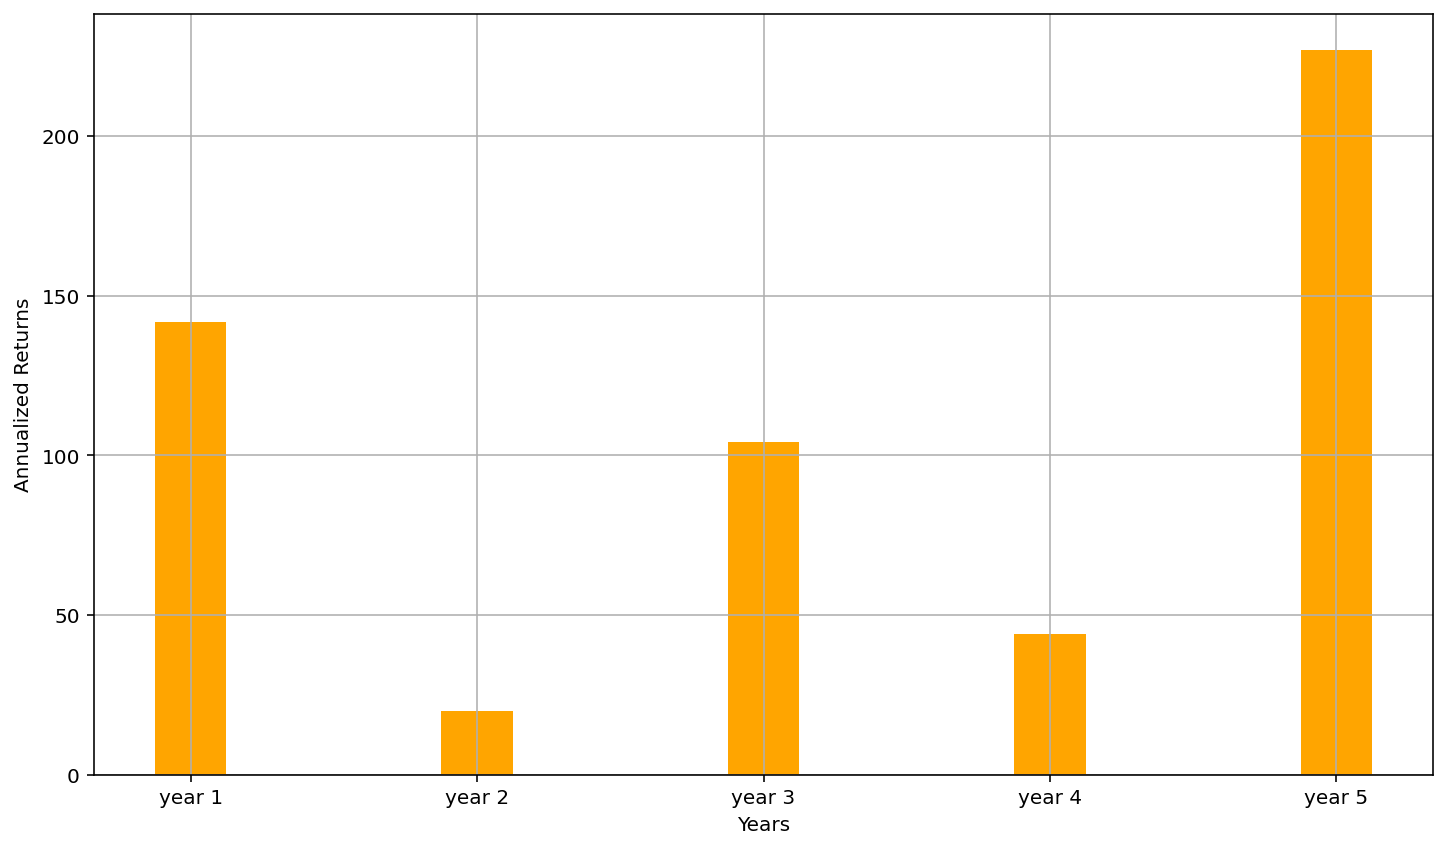

In [259]:
ax = plt.gca()
ax.set(xlabel="Years", ylabel='Annualized Returns')
years = ['year 1','year 2','year 3','year 4','year 5']
(dataset, str) = (dataset_moderate, 'combined')
ar = annual_return(dataset, str)
ax.bar( years[0], ar[0], color = 'orange', width = 0.25)
ax.bar( years[1], ar[1], color = 'orange', width = 0.25)
ax.bar( years[2], ar[2], color = 'orange', width = 0.25)
ax.bar( years[3], ar[3],color = 'orange', width = 0.25)
ax.bar( years[4], ar[4],color = 'orange', width = 0.25)
plt.grid()
plt.savefig('annual_return_moderate.png')

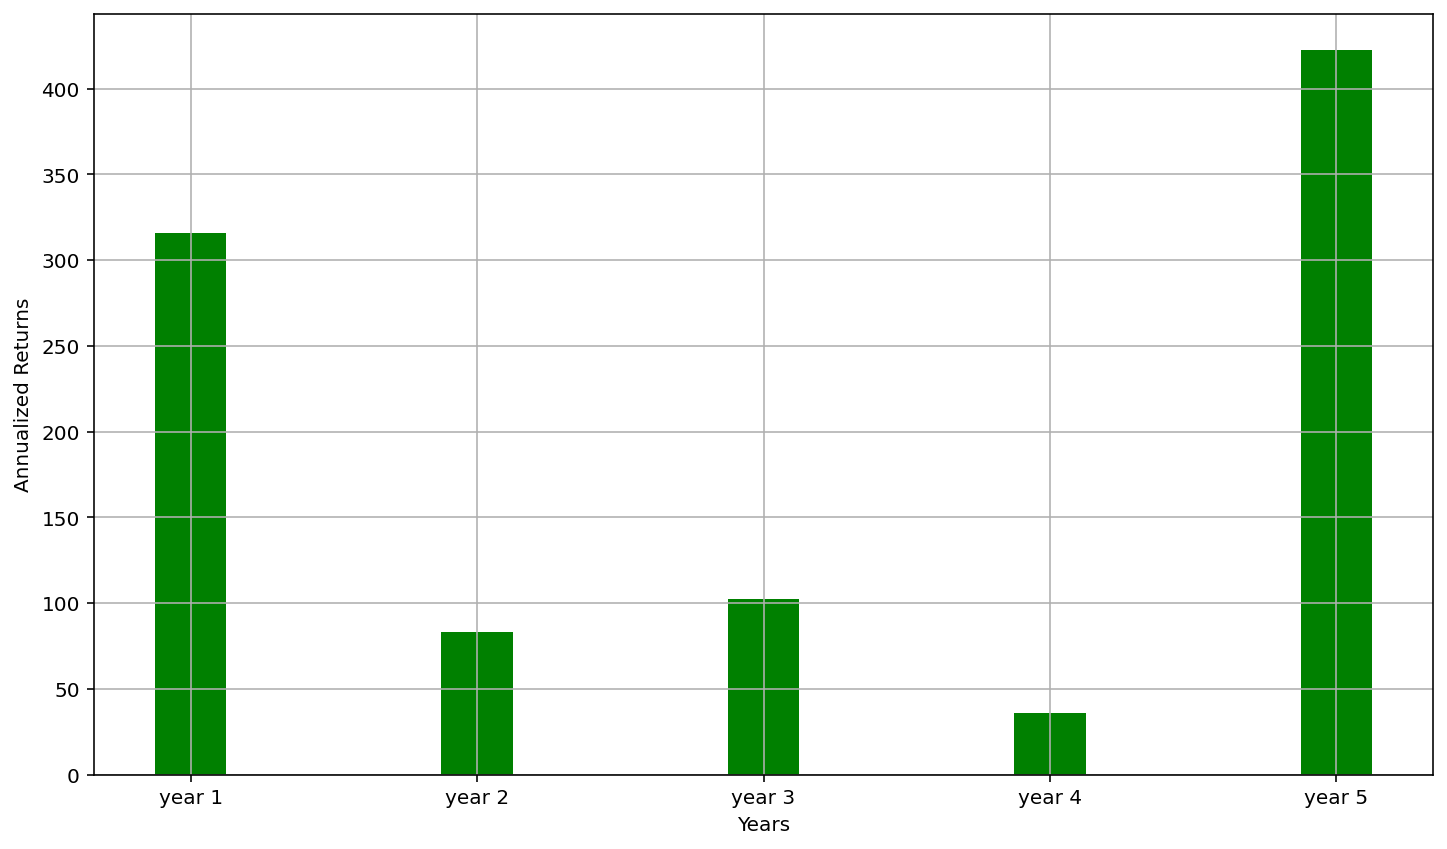

In [260]:
ax = plt.gca()
ax.set(xlabel="Years", ylabel='Annualized Returns')
years = ['year 1','year 2','year 3','year 4','year 5']
(dataset, str) = (dataset_conservative, 'combined')
ar = annual_return(dataset, str)
ax.bar( years[0], ar[0], color = 'green', width = 0.25)
ax.bar( years[1], ar[1], color = 'green', width = 0.25)
ax.bar( years[2], ar[2], color = 'green', width = 0.25)
ax.bar( years[3], ar[3],color = 'green', width = 0.25)
ax.bar( years[4], ar[4],color = 'green', width = 0.25)
plt.grid()
plt.savefig('annual_return_conservative.png')